### Author: Jesus Cantu Jr.
### Last Updated: October 7, 2023

![TalkBank Logo](./TalkBank.png)

[TalkBank](https://www.talkbank.org/) is a research project and online database that provides access to a wide range of linguistic and communication data, particularly in the context of research related to language acquisition, development, and communication disorders. TalkBank hosts a vast collection of audio and video recordings, transcripts, and associated metadata from various studies related to language and communication.

Data in TalkBank have been contributed by hundreds of researchers working in over 34 languages internationally who are committed to principles of open data-sharing. These data are used by thousands of researchers resulting in many thousands of published articles.

Here we will be focusing on data from the Child Language Bank: __HomeBank__, a resource for shared multi-hour, real-world recordings of children’s everyday experiences (for example, daylong home recordings using the LENA system), plus tools for analyzing those recordings. 

## Transcript Conversion
Transcripts of the audios can be downloaded as text files and contain the following format, which we would like to update for subsequent analysis: 

In [78]:
# Read the content of the file
with open("./original_audio_transcripts/homebank.talkbank.org_data-orig_Public_VanDam-5minute_AR31_AR31_021108a.cha.txt", 'r') as file:
    content = file.readlines()

# Display the first 20 lines to understand the structure
content[:20]

['@UTF8\n',
 '@PID:\t11312/a-00002867-1\n',
 '@Begin\n',
 '@Languages:\teng\n',
 '@Participants:\tCHI Target_Child, MOT Mother\n',
 '@ID:\teng|VanDam-5minute|CHI||male|HI||Target_Child|||\n',
 '@ID:\teng|VanDam-5minute|MOT||female|||Mother|||\n',
 '@Media:\tAR31_021108a, audio\n',
 '@Date:\t06-MAR-2010\n',
 '@Comment:\tstart at 9805, 10:30\n',
 '*CHI:\tchoo_choo train . \x150_1180\x15\n',
 '%mor:\ton|choo&DUP n|train .\n',
 '%gra:\t1|2|MOD 2|0|INCROOT 3|2|PUNCT\n',
 '*CHI:\tchoo_choo train go bye . \x151180_4341\x15\n',
 '%mor:\ton|choo&DUP n|train v|go co|bye .\n',
 '%gra:\t1|3|LINK 2|3|SUBJ 3|0|ROOT 4|3|OBJ 5|3|PUNCT\n',
 '*CHI:\t&=yells hm . \x154341_6515\x15\n',
 '%mor:\tco|hm .\n',
 '%gra:\t1|0|INCROOT 2|1|PUNCT\n',
 '*CHI:\thm I no xxx choo_choo train . \x156515_10964\x15\n']

It appears that the file contains metadata at the beginning (lines starting with `@`). The actual transcriptions seem to start with identifiers like `*CHI:` and `*MOT:` which likely stand for "child" and "mother", respectively. The lines following the transcriptions (starting with `%`) seem to contain some kind of linguistic annotation, which we might not need for our task.

Given this, we can extract the lines that start with `*CHI:` and `*MOT:` and their corresponding text to create a list of tuples like so:

In [80]:
# Extract relevant lines and create the list of tuples
transcript_tuples = []

for line in content:
    if line.startswith('*CHI:'):
        transcript_tuples.append(('child', line[5:].strip().split(' \x15')[0].strip()))
    elif line.startswith('*MOT:'):
        transcript_tuples.append(('mother', line[5:].strip().split(' \x15')[0].strip()))

# Display the first few tuples to confirm
transcript_tuples[:10]


[('child', 'choo_choo train .'),
 ('child', 'choo_choo train go bye .'),
 ('child', '&=yells hm .'),
 ('child', 'hm I no xxx choo_choo train .'),
 ('child', 'da_da_da_da_da@si .'),
 ('child', 'yyy yyy pee_pee .'),
 ('child', 'yyy .'),
 ('mother', "alright Ray let's go sit on the pee_pee pot ."),
 ('mother', '&=shivers .'),
 ('child', '&=squeals .')]

Great! However, we might be interested in converting more than one transcript at any given time. Lets make this process easier by creating a series of functions for it. Here we will asume that the tanscript files we might encounter later have the same structure as the one above. 

In [114]:
def extract_transcripts_and_convert_to_tuples(filepath):
    """
    Reads a file and extracts the relevant lines to create a list of tuples with the format ("child", "child_text")
    or ("mother", "mother_text").

    Args:
    - filepath (str): Path to the file to be read.

    Returns:
    - list: List of tuples with the format ("child", "child_text") or ("mother", "mother_text").
    """
    transcript_tuples = []
    transcript_without_identifiers = []

    def process_line(line):
        if line.startswith('*CHI:'):
            return ('child', line[5:].strip().split(' \x15')[0].strip())
        elif line.startswith('*MOT:'):
            return ('mother', line[5:].strip().split(' \x15')[0].strip())
        else:
            return None

    try:
        with open(filepath, 'r') as file:
            for line in file:
                result = process_line(line)
                if result:
                    transcript_tuples.append(result)
                # Store lines without identifiers in a separate list
                transcript_without_identifiers.append(line.strip())
        print("Transcript converted to list of tuples.")
        return transcript_tuples, transcript_without_identifiers
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return [], []

def save_tuples_to_file(output_filepath, transcript_tuples):
    """
    Saves a list of transcript tuples to a text file.

    Args:
    - output_filepath (str): Path to the file where the tuples will be saved.
    - transcript_tuples (list): List of tuples with the format ("child", "child_text") or ("mother", "mother_text").
    """
    with open(output_filepath, 'w') as file:
        for role, text in transcript_tuples:
            file.write(f'{role}: {text}\n')
        print("Transcript tuples saved to text file.")

def save_tuples_to_file_without_identifiers(output_filepath, transcript_tuples):
    """
    Saves a list of transcript tuples without identifiers to a text file.

    Args:
    - output_filepath (str): Path to the file where the tuples without identifiers will be saved.
    - transcript_tuples (list): List of tuples with the format ("child", "child_text") or ("mother", "mother_text").
    """
    with open(output_filepath, 'w') as file:
        for _, text in transcript_tuples:
            file.write(f'{text}\n')
        print("Transcript tuples without identifiers saved to text file.")

# Example usage
input_file_path = "./original_audio_transcripts/homebank.talkbank.org_data-orig_Public_VanDam-5minute_AR31_021108b.cha.txt"  # Include name of input file!
output_file_path = "./generated_audio_transcripts/transcript_tuples/AR31_021108b_tuples.txt"  # Include name of first output file!
output_file_path_without_identifiers = "./generated_audio_transcripts/transcript_tuples/AR31_021108b_no_identifiers.txt" # Include name of second output file!

transcript_tuples, transcript_without_identifiers = extract_transcripts_and_convert_to_tuples(input_file_path)
save_tuples_to_file(output_file_path, transcript_tuples)
save_tuples_to_file_without_identifiers(output_file_path_without_identifiers, transcript_tuples)

Transcript converted to list of tuples.
Transcript tuples saved to text file.
Transcript tuples without identifiers saved to text file.


This code can later be improved to facilitate the way it obtains input file paths and automate the naming conventations of the output, as well as the return type (in this instance we want a text file).

## Transcript Analysis

When analyzing textual data, the format and structure of the data often depend on the specific analytic tasks you aim to carry out. Here are a few recommended data analytic tasks and the potential data structures/formats to consider:

1. **Frequency Analysis**:
   - *Task*: Count the number of times specific words or phrases are mentioned by the child or mother.
   - *Recommended Format*: A dictionary where keys are words/phrases and values are counts.
   
2. **Sentiment Analysis**:
   - *Task*: Determine the sentiment or emotion in each statement made by the child or mother (e.g., positive, negative, neutral).
   - *Recommended Format*: A list of dictionaries where each dictionary has keys like "speaker", "text", and "sentiment".

3. **Length Analysis**:
   - *Task*: Analyze the length of each statement to see if there's a pattern in the verbosity of the child or mother.
   - *Recommended Format*: A pandas DataFrame with columns for the speaker, text, and length of the statement.

4. **Topic Modeling**:
   - *Task*: Identify common topics or subjects discussed by the child or mother.
   - *Recommended Format*: A list of text statements or a single concatenated text. Advanced tools like LDA (Latent Dirichlet Allocation) can then be used.

5. **Time Series Analysis** (if timestamps are considered):
   - *Task*: Analyze the frequency of statements or specific words/phrases over time.
   - *Recommended Format*: A pandas DataFrame with timestamps as the index.


## Frequency analysis
For the frequency analysis, we'll carry out the following steps:

1. Convert the list of tuples into a pandas DataFrame for easier manipulation.
2. Tokenize the text (split it into individual words).
3. Count the frequency of each word for both the child and the mother.
4. Visualize the top words for both the child and the mother.

Let's start by converting the list of tuples into a `pandas` DataFrame.

In [85]:
import pandas as pd

# Convert the list of tuples into a DataFrame
df = pd.DataFrame(transcript_tuples, columns = ["speaker", "text"])

# Display the first few rows of the DataFrame
df.head()


,speaker,text
0,child,wapa@b &=grunts .
1,child,up [/] up [/] up [/] up [/] up .
2,child,&=mumbles .
3,mother,say one .
4,child,two three go .


Now that we have the data in a DataFrame format, we can proceed with tokenizing the text. Tokenization involves splitting the text into individual words. After tokenization, we'll count the frequency of each word for both the child and the mother, focusing particularly on the 10 most/least common used words. 

In [89]:
from collections import Counter
import re

def tokenize(text):
    """Tokenize the text by removing special characters (punctuation and parentheses) and splitting into words."""
    # Remove special characters (punctuation and parentheses) and split text into words
    cleaned_text = re.sub(r'[^\w\s()]', '', text)  # This regex pattern matches any character that is not a word character, space, or parentheses
    return re.findall(r'\b\w+\b', cleaned_text.lower())

# Tokenize the text for each row
df['tokens'] = df['text'].apply(tokenize)

# Count the frequency of each word for the child and the mother
child_word_counts = Counter()
mother_word_counts = Counter()

for index, row in df.iterrows():
    if row['speaker'] == 'child':
        child_word_counts.update(row['tokens'])
    else:
        mother_word_counts.update(row['tokens'])

# Get the top 10 most common words for both the child and the mother
top_child_words_counts = child_word_counts.most_common(10)
top_mother_words_counts = mother_word_counts.most_common(10)
       
# Extracting the least 10 common words for both the child and the mother
least_child_words_counts = child_word_counts.most_common()[:-11:-1]
least_mother_words_counts = mother_word_counts.most_common()[:-11:-1]


In [90]:
# Display the first few rows of the updated DataFrame
df.head()

,speaker,text,tokens
0,child,wapa@b &=grunts .,"[wapab, grunts]"
1,child,up [/] up [/] up [/] up [/] up .,"[up, up, up, up, up]"
2,child,&=mumbles .,[mumbles]
3,mother,say one .,"[say, one]"
4,child,two three go .,"[two, three, go]"


In [91]:
# Display the last few rows of the updated DataFrame
df.tail()

,speaker,text,tokens
98,mother,I don't like it (be)cause it won't stay togeth...,"[i, dont, like, it, be, cause, it, wont, stay,..."
99,child,yyy choo_choo train .,"[yyy, choo_choo, train]"
100,mother,I don't know .,"[i, dont, know]"
101,child,"oh no, what gonna [: going to] do ?","[oh, no, what, gonna, going, to, do]"
102,mother,"I don't know what we're gonna [: going to] do,...","[i, dont, know, what, were, gonna, going, to, ..."


Alright, let's visualize the word frequencies for both the child and the mother using `bar plots`. This will provide a clear comparison of the top words used by each speaker.

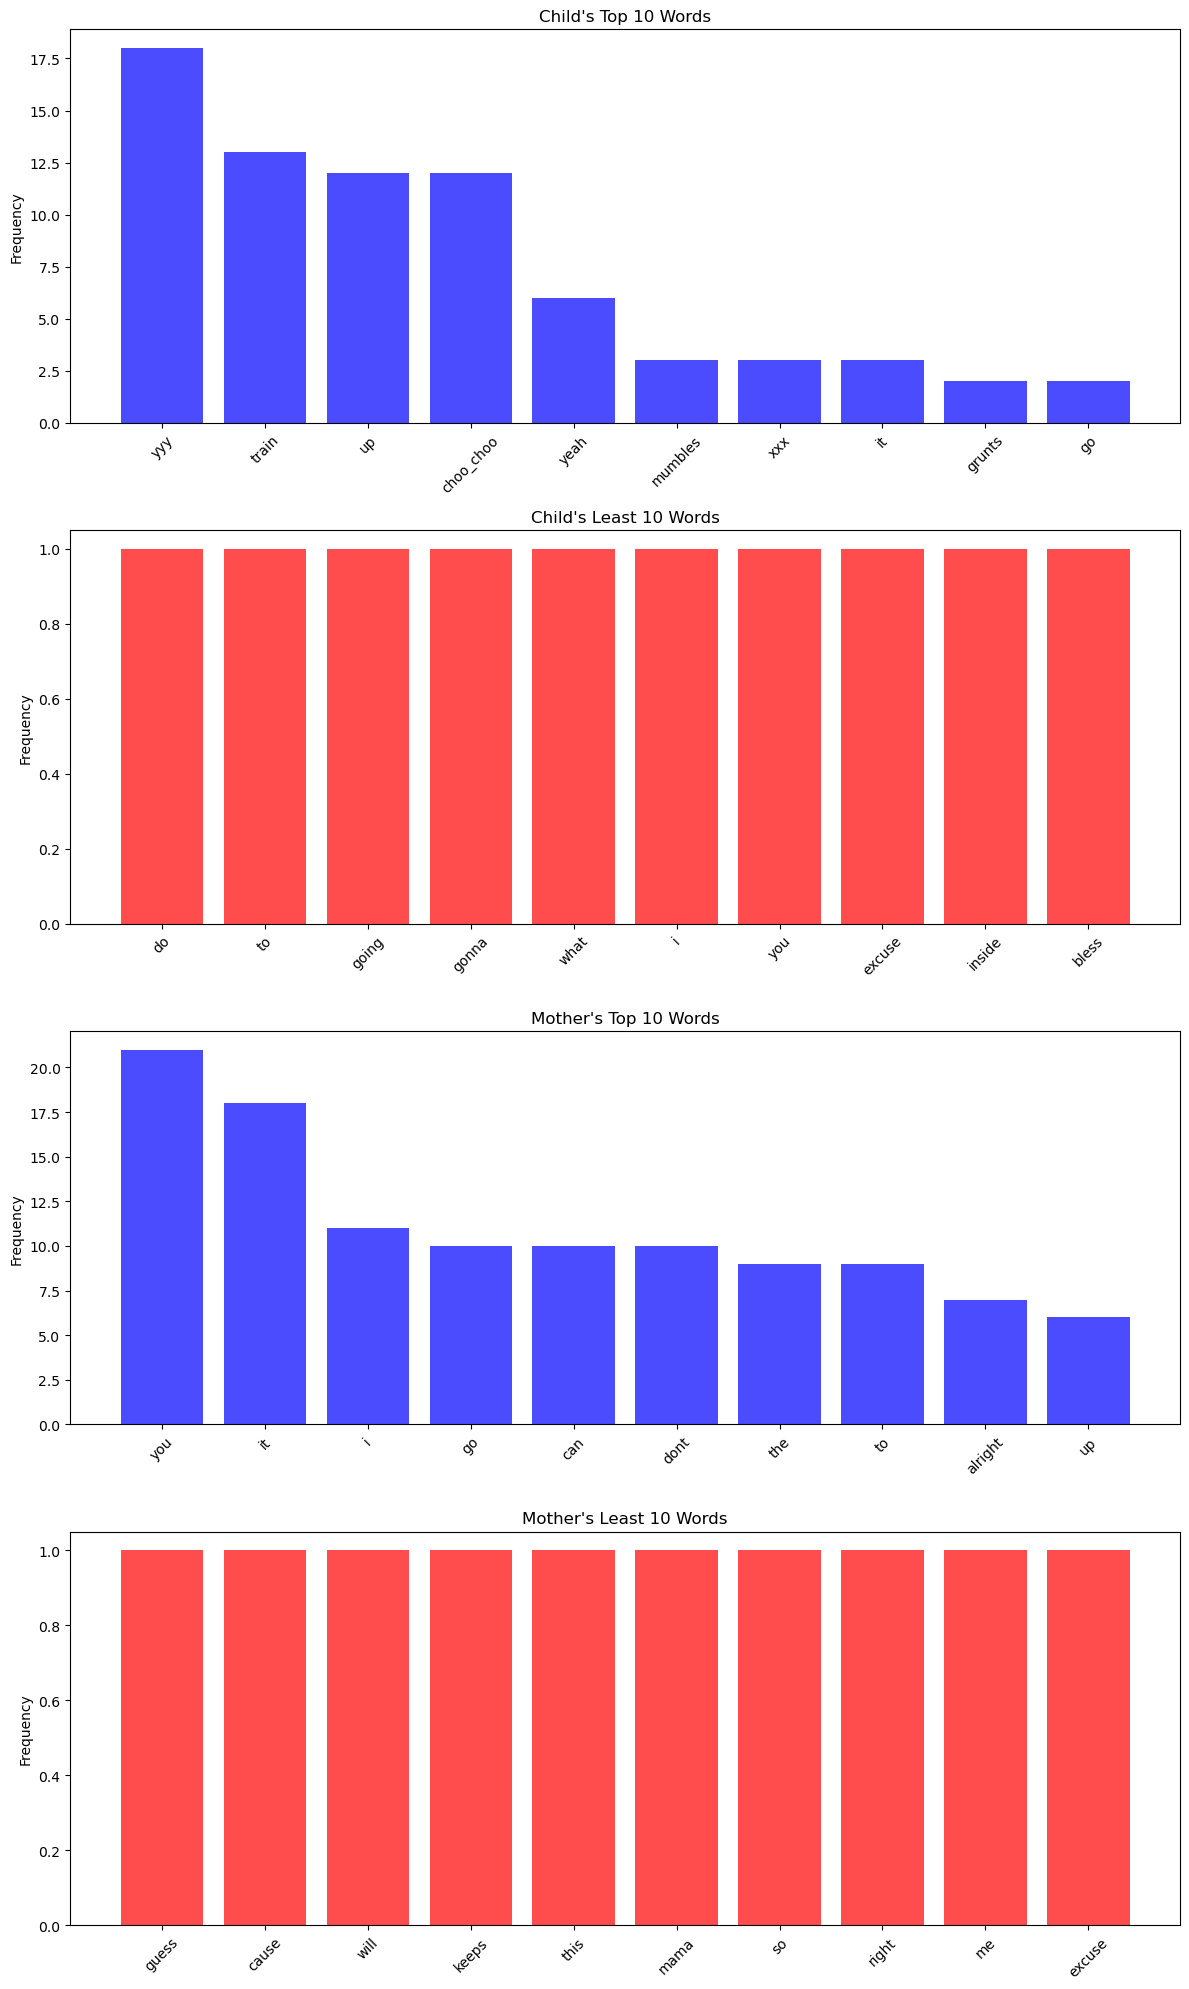

In [92]:
import matplotlib.pyplot as plt

# Separate words and counts for child's and mother's top 10 words
top_child_words, top_child_counts = zip(*top_child_words_counts)
top_mother_words, top_mother_counts = zip(*top_mother_words_counts)

# Separate words and counts for child's and mother's least 10 words
least_child_words, least_child_counts = zip(*least_child_words_counts)
least_mother_words, least_mother_counts = zip(*least_mother_words_counts)

# Set up the figure and axes
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (12, 20))

# Plot for child's top 10 words
ax[0].bar(top_child_words, top_child_counts, color = 'blue', alpha = 0.7)
ax[0].set_title("Child's Top 10 Words")
ax[0].set_ylabel("Frequency")
ax[0].tick_params(axis = 'x', rotation = 45)

# Plot for child's least 10 words
ax[1].bar(least_child_words, least_child_counts, color='red', alpha=0.7)
ax[1].set_title("Child's Least 10 Words")
ax[1].set_ylabel("Frequency")
ax[1].tick_params(axis = 'x', rotation = 45)

# Plot for mother's top 10 words
ax[2].bar(top_mother_words, top_mother_counts, color = 'blue', alpha = 0.7)
ax[2].set_title("Mother's Top 10 Words")
ax[2].set_ylabel("Frequency")
ax[2].tick_params(axis = 'x', rotation = 45)

# Plot for mother's least 10 words
ax[3].bar(least_mother_words, least_mother_counts, color='red', alpha=0.7)
ax[3].set_title("Mother's Least 10 Words")
ax[3].set_ylabel("Frequency")
ax[3].tick_params(axis = 'x', rotation = 45)

# Adjust layout
plt.tight_layout()
plt.show()


This provides a clear comparison of the most and least common words used by each speaker. To improve the separation of actual words vs. sounds in our code, we can incorporate more sophisticated text processing techniques to filter out common sounds or non-informative words, suggestions include:

1. __Removing Stop Words__: Stop words are common words (e.g., "and," "the," "is") that do not carry significant meaning and can be safely removed from the text. We can use a list of stop words from a library like `NLTK` or `spaCy` to filter them out.

2. __Stemming or Lemmatization__: Applying stemming or lemmatization to reduce words to their base form. This can help in collapsing variations of words to a common form. Libraries like `NLTK` or `spaCy` can help with this.

3. __Custom Filtering__: We can create a custom list of words or patterns that represent sounds or non-informative elements in our specific context and filter them out by:
    - __Identifying Sounds__: We can define a list of sound patterns or regular expressions that represent sounds. These patterns should match the sounds we want to separate from words (e.g., 'yyy', 'xxx', and 'mumbles').
    - __Modifying the Tokenization Function__: We can update the `tokenize` function to not only tokenize words but also identify and tokenize sounds based on the defined patterns.
    - __Separating Sounds and Words__: In the code for counting word frequencies, we can distinguish between sounds and words by checking if a token matches the sound patterns. We can then use separate counters for sounds and words.

Note, analyzing sounds might give us further insights into the development of the child, in terms of language acquisition and how they respond to certain stimuli (i.e., spatial awareness). 


## Lenght analysis
For the length analysis, we can look at:

1. __Average Length of Statements__: This will give us an idea of the typical length of statements made by the child and the mother.
2. __Distribution of Statement Lengths__: We can visualize the distribution of statement lengths to understand the spread and variance.
3. __Comparison of Lengths__: We can compare the average statement lengths of the child and the mother to see if one tends to speak longer sentences than the other.

Let's start by calculating the average length of statements for both the child and the mother. We'll measure length in terms of the number of words in each statement.

In [95]:
# Calculate the length of each statement in terms of number of words
df['length'] = df['tokens'].apply(len)

# Display the first few rows of the updated DataFrame
df.head()

,speaker,text,tokens,length
0,child,wapa@b &=grunts .,"[wapab, grunts]",2
1,child,up [/] up [/] up [/] up [/] up .,"[up, up, up, up, up]",5
2,child,&=mumbles .,[mumbles],1
3,mother,say one .,"[say, one]",2
4,child,two three go .,"[two, three, go]",3


In [97]:
# Calculate average length for child and mother
avg_child_length = df[df['speaker'] == 'child']['length'].mean()
avg_mother_length = df[df['speaker'] == 'mother']['length'].mean()

print(f'Average lenght of statement for child: {round(avg_child_length, 0)} words')
print(f'Average lenght of statement for mother: {round(avg_mother_length, 0)} words')

Average lenght of statement for child: 3.0 words
Average lenght of statement for mother: 5.0 words


This indicates that, on average, the mother's statements are longer than the child's statements. Next, let's visualize the distribution of statement lengths for both the child and the mother to get a deeper understanding of the spread of lengths.

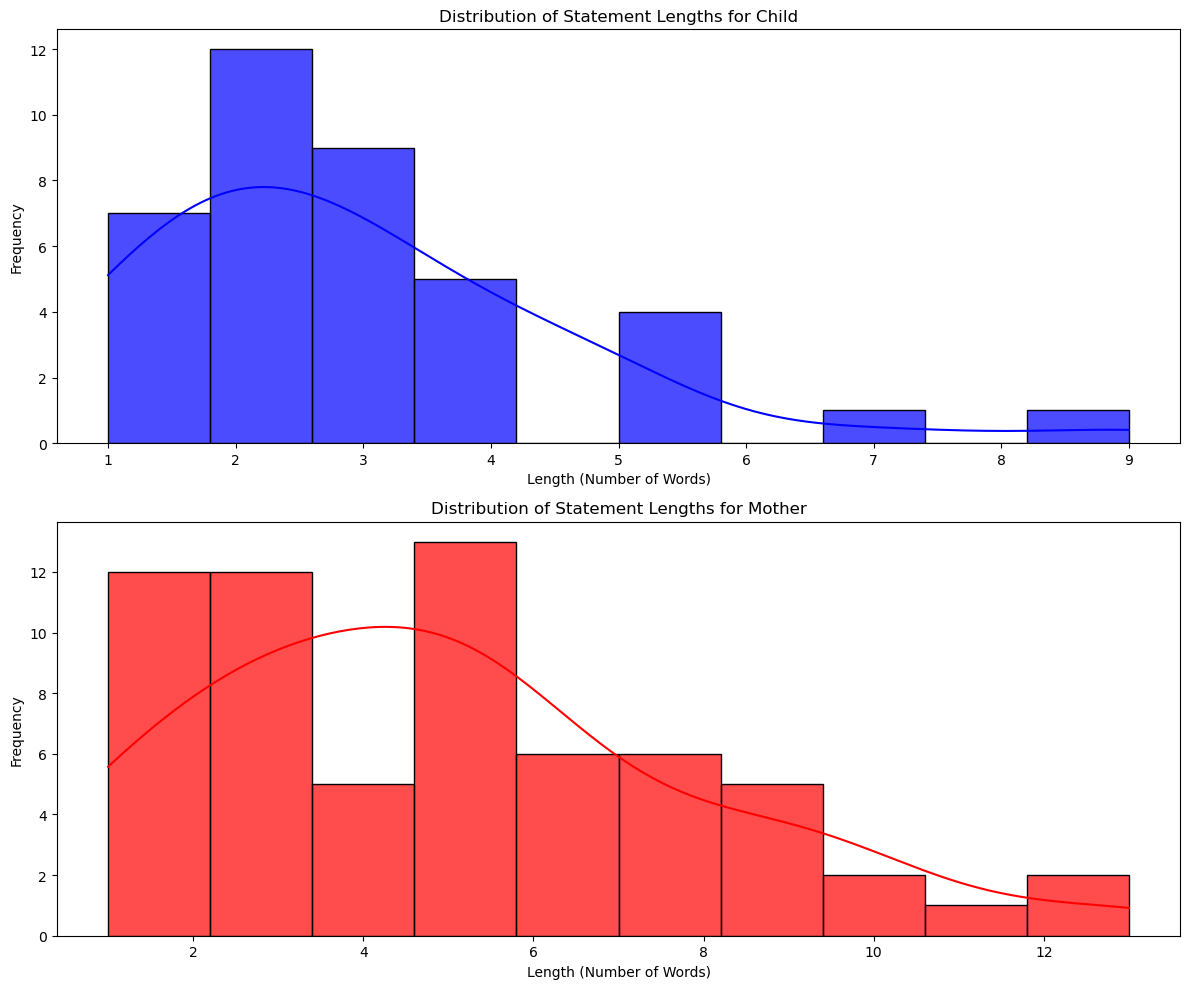

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 10))

# Plot distribution of statement lengths for child
sns.histplot(df[df['speaker'] == 'child']['length'], ax = ax[0], bins = 10, color = 'blue', alpha = 0.7, kde = True)
ax[0].set_title("Distribution of Statement Lengths for Child")
ax[0].set_xlabel("Length (Number of Words)")
ax[0].set_ylabel("Frequency")

# Plot distribution of statement lengths for mother
sns.histplot(df[df['speaker'] == 'mother']['length'], ax = ax[1], bins = 10, color = 'red', alpha = 0.7, kde = True)
ax[1].set_title("Distribution of Statement Lengths for Mother")
ax[1].set_xlabel("Length (Number of Words)")
ax[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


The `histograms` above show the distribution of statement lengths for both the child and the mother:

- __Child's Statement Lengths__: Most of the child's statements are short, with a large number of them being around 1 to 3 words in length.
- __Mother's Statement Lengths__: The mother's statements show a broader distribution, with peaks around 2 to 5 words.

From the visualizations, we can infer that while the child typically utters shorter sentences, the mother has a more varied sentence length with some longer sentences. If we wanted to extract which exact statements correspond to the longest and shortest sentences spoken for both child and mother we could try: 

In [99]:
# Extracting the longest and shortest statements for both child and mother
child_max_length_text = df[df['speaker'] == 'child'].sort_values(by = 'length', ascending = False).iloc[0]['text']
child_min_length_text = df[df['speaker'] == 'child'].sort_values(by = 'length', ascending = True).iloc[0]['text']

mother_max_length_text = df[df['speaker'] == 'mother'].sort_values(by = 'length', ascending = False).iloc[0]['text']
mother_min_length_text = df[df['speaker'] == 'mother'].sort_values(by = 'length', ascending = True).iloc[0]['text']

print(f'Shortest statement for child: {child_min_length_text}')
print(f'Longest statement for child: {child_max_length_text}')
print()
print(f'Shortest statement for mother: {mother_min_length_text}')
print(f'Longest statement for mother: {mother_max_length_text}')

Shortest statement for child: okay !
Longest statement for child: yeah down up [/] up [/] up [/] up [/] up [/] up [/] up  .

Shortest statement for mother: uhoh .
Longest statement for mother: Ray where do you need to be on the outside or the inside ?


Another way to visualize the distribution of statement lengths for both speakers is using `box plots`.

<Figure size 1000x600 with 0 Axes>

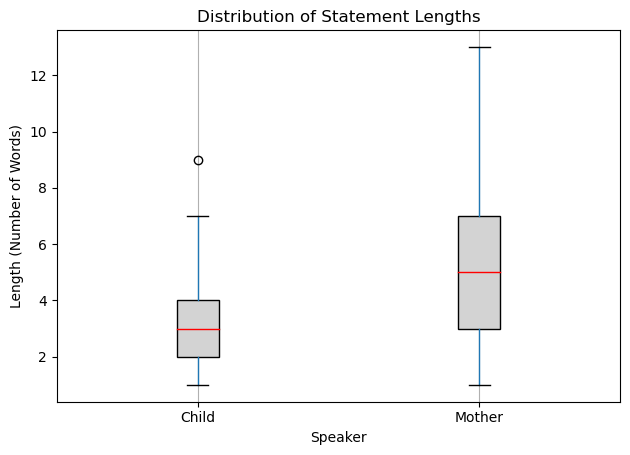

In [76]:
# Set up the figure
plt.figure(figsize = (10, 6))

# Box plot for distribution of statement lengths
df.boxplot(column = 'length', by = 'speaker', patch_artist = True, 
           boxprops = dict(facecolor = 'lightgray', color = 'black'),
           medianprops = dict(color = 'red'))

plt.title("Distribution of Statement Lengths")
plt.suptitle('')  # Suppress default title
plt.xlabel("Speaker")
plt.ylabel("Length (Number of Words)")
plt.xticks([1, 2], ['Child', 'Mother'])
plt.grid(axis = 'y')

plt.tight_layout()
plt.show()


The `box plot` provides a visual summary of the distribution of statement lengths for both the child and the mother:

- The box represents the interquartile range (IQR), which covers the 25th to 75th percentiles.
- The line inside the box is the median (50th percentile).
- The whiskers extend to data points within 1.5 times the IQR.
- Any points outside the whiskers can be considered outliers.

From the plot, we can observe:
- The mother generally has a wider range of statement lengths compared to the child.
- The median statement length for the mother is longer than that of the child.

Next, let's plot the `Cumulative Distribution Function (CDF)` to understand the proportion of statements below certain lengths.

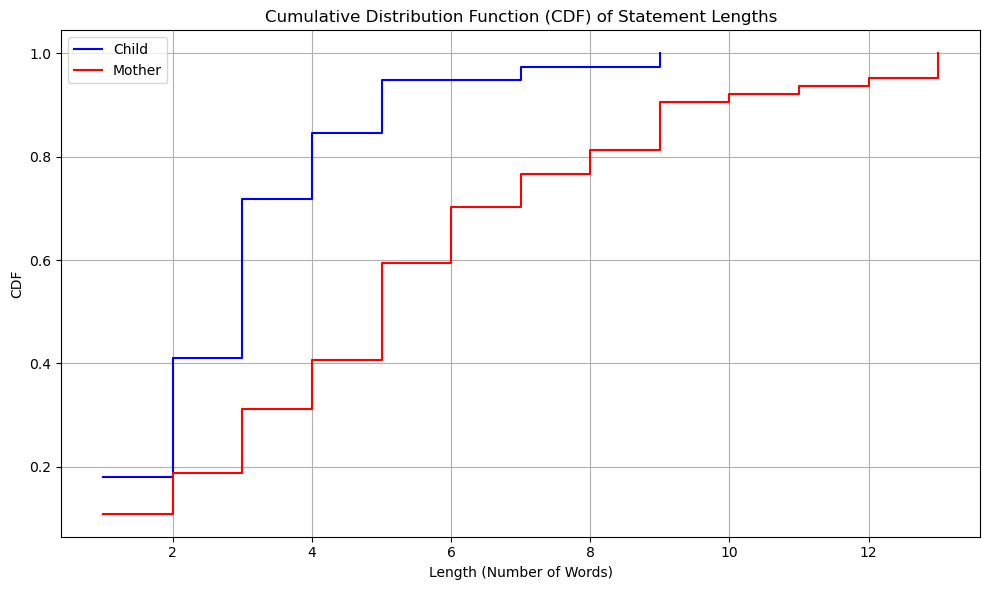

In [77]:
# Calculate the CDF for both child and mother
child_lengths = df[df['speaker'] == 'child']['length']
mother_lengths = df[df['speaker'] == 'mother']['length']

child_cdf = child_lengths.value_counts(normalize = True).sort_index().cumsum()
mother_cdf = mother_lengths.value_counts(normalize = True).sort_index().cumsum()

# Plotting the CDF
plt.figure(figsize = (10, 6))

child_cdf.plot(drawstyle = 'steps-post', label = 'Child', color = 'blue')
mother_cdf.plot(drawstyle = 'steps-post', label = 'Mother', color = 'red')

plt.title("Cumulative Distribution Function (CDF) of Statement Lengths")
plt.xlabel("Length (Number of Words)")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


The `Cumulative Distribution Function (CDF)` plot provides insights into the distribution of statement lengths:

- The __x-axis__ represents the length of statements in terms of the number of words.
- The __y-axis__ represents the cumulative proportion of statements that are of a given length or shorter.

From the plot, we can observe:

- For both the child and mother, a large proportion of the statements are short.
- By looking at where the lines reach a CDF value of 0.5 (50%), we can see that half of the child's statements are 3 words or shorter, while half of the mother's statements are around 5 words or shorter.
- The child's line saturates faster, indicating that there are fewer long statements by the child compared to the mother.